# 8 Montecarlo
##### Monte Carlo Integration

Vamos a integrar una funcion medio patologica


In [1]:
from math import sin
from random import random

def f(x):
    return (sin(1/(x*(2-x))))**2

# la integramos de 0 a 2
# la funcion esta acotada en 0<f(x)<1

N = 100000
count = 0
for i in range(N):
    # agarramos un punto en el cuadrado
    x = 2*random()
    y = random()
    #vemos si cae dentro de la funcion
    if y<f(x):
        count += 1
        
# calculamos el area de la integral
I = 2*count/N
print(I)

1.45102


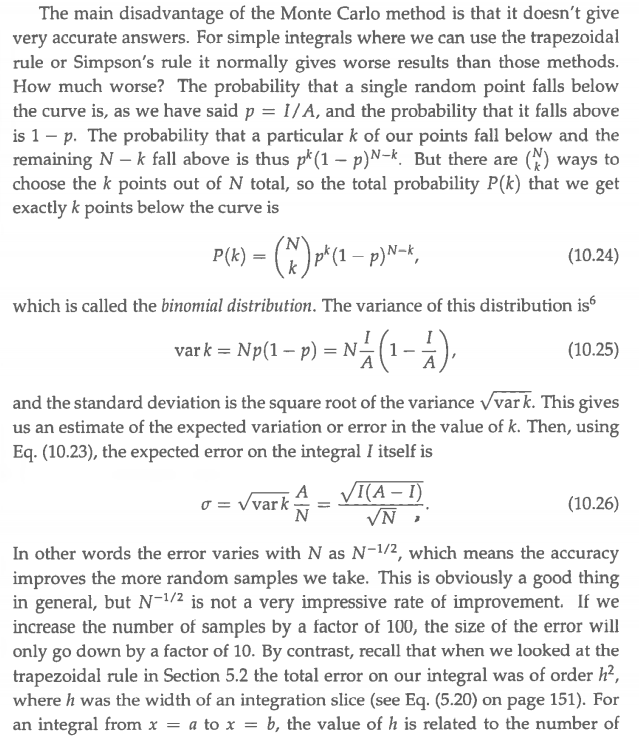

__Mean Value method__

An integral is $I = (b-a) \langle f \rangle$ <br>
With $\langle f \rangle$ the average. If we can approximate it, we can approximate the integral. <br>
To approximate, we can take a sample of points and use $\langle f \rangle \simeq \dfrac{1}{N} \sum_{i=1}^N f(x_i)$

###### Montecarlo Simlation of an ideal gas



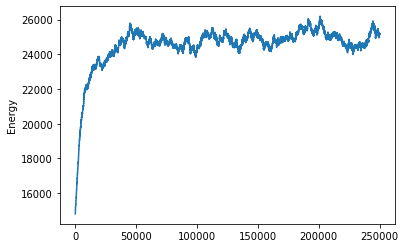

In [2]:
from random import random,randrange
from math import exp,pi
from numpy import ones
from pylab import plot,ylabel,show

T = 10.0
N = 1000
steps = 250000

# Create a 2D array to store the quantum numbers
n = ones([N,3],int)

# Main loop
eplot = []
E = 3*N*pi*pi/2
for k in range(steps):

    # Choose the particle and the move
    i = randrange(N)
    j = randrange(3)
    if random()<0.5:
        dn = 1
        dE = (2*n[i,j]+1)*pi*pi/2
    else:
        dn = -1
        dE = (-2*n[i,j]+1)*pi*pi/2

    # Decide whether to accept the move
    if n[i,j]>1 or dn==1:
        if random()<exp(-dE/T):
            n[i,j] += dn
            E += dE

    eplot.append(E)

# Make the graph
plot(eplot)
ylabel("Energy")
show()

Salesman

In [3]:
from math import sqrt,exp
from numpy import empty
from random import random,randrange
#from visual import sphere,curve,display

N = 25
R = 0.02
Tmax = 10.0
Tmin = 1e-3
tau = 1e4

# Function to calculate the magnitude of a vector
def mag(x):
    return sqrt(x[0]**2+x[1]**2)

# Function to calculate the total length of the tour
def distance():
    s = 0.0
    for i in range(N):
        s += mag(r[i+1]-r[i])
    return s

# Choose N city locations and calculate the initial distance
r = empty([N+1,2],float)
for i in range(N):
    r[i,0] = random()
    r[i,1] = random()
r[N] = r[0]
D = distance()

# Set up the graphics
#display(center=[0.5,0.5])
#for i in range(N):
#    sphere(pos=r[i],radius=R)
#l = curve(pos=r,radius=R/2)

# Main loop
t = 0
T = Tmax
while T>Tmin:

    # Cooling
    t += 1
    T = Tmax*exp(-t/tau)

    # Update the visualization every 100 moves
    #if t%100==0:
        #l.pos = r

    # Choose two cities to swap and make sure they are distinct
    i,j = randrange(1,N),randrange(1,N)
    while i==j:
        i,j = randrange(1,N),randrange(1,N)

    # Swap them and calculate the change in distance
    oldD = D
    r[i,0],r[j,0] = r[j,0],r[i,0]
    r[i,1],r[j,1] = r[j,1],r[i,1]
    D = distance()
    deltaD = D - oldD

    # If the move is rejected, swap them back again
    if random()>exp(-deltaD/T):
        r[i,0],r[j,0] = r[j,0],r[i,0]
        r[i,1],r[j,1] = r[j,1],r[i,1]
        D = oldD